In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


In [59]:

from google.colab import drive
drive.mount('/content/drive')
# Carregar o dataset processado no notebook anterior
caminho_arquivo = '/content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/Credit_Card_Processed.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv(caminho_arquivo)

#Armazenar coluna id
coluna_id = df['CUST_ID']
# Separar novamente o ID para não entrar na conta do K-Means
df_modelagem = df.drop(columns=['CUST_ID'])

df_modelagem.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960378,-0.528979,-0.297310,0.000000,0.36068
1,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688678,0.818642,0.102042,0.222222,0.36068
2,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826100,-0.383805,-0.088489,0.000000,0.36068
3,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826100,-0.598688,-0.357035,0.000000,0.36068
4,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905410,-0.364368,-0.252238,0.000000,0.36068


In [64]:
#Armazenar coluna id
coluna_id

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


##  Protocolo de Experimentação
Para garantir a robustez da segmentação, foi implementado um benchmark comparativo:
- **Algoritmos:** K-Means, Expectation-Maximization (GMM) e Clustering Hierárquico.
- **Variação de Hiperparâmetros:** $K$ variando de 2 a 20.
- **Teste de Estabilidade:** Cada modelo foi executado 3 vezes com diferentes sementes aleatórias (`seeds: 10, 20, 30`).
- **Métrica de Sucesso:** Coeficiente de Silhueta para medir a coesão e separação dos clusters.

### 📍 Algoritmo 1: K-Means
- **Intervalo de K:** 2 a 20.
- **Seeds:** 10, 20, 30.
- **Métricas de Avaliação:**
  - **Silhouette Score:** Mede a qualidade da separação (Intervalo: -1 a 1 | **Maior é melhor**).
  - **Davies-Bouldin Index:** Mede a razão entre a dispersão interna e a separação entre clusters (**Menor é melhor**).
- **Observação:** O uso do Davies-Bouldin Index complementa a análise da Silhueta, pois foca na similaridade média entre os clusters. Um DBI baixo indica que os grupos estão bem definidos e minimamente sobrepostos.

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Lista para armazenar os resultados do K-Means
resultados_kmeans = []
seeds = [10, 20, 30]
k_range = range(2, 21)

print("Iniciando processamento do K-Means com Silhueta e Davies-Bouldin...")

for s in seeds:
    for k in k_range:
        # Inicializando e treinando o K-Means
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=s)
        labels = kmeans.fit_predict(df_modelagem)

        # Calculando as métricas
        s_score = silhouette_score(df_modelagem, labels)
        db_score = davies_bouldin_score(df_modelagem, labels)

        resultados_kmeans.append({
            'Algoritmo': 'K-Means',
            'K': k,
            'Seed': s,
            'Silhueta': s_score,
            'DB_Index': db_score
        })

# Criando DataFrame para análise
df_km_results = pd.DataFrame(resultados_kmeans)
print("Concluído!")

# Visualizando os melhores resultados pelo DB Index (menor é melhor)
df_km_results.sort_values(by='DB_Index', ascending=True).head()

Iniciando processamento do K-Means com Silhueta e Davies-Bouldin...
Concluído!


,Algoritmo,K,Seed,Silhueta,DB_Index
4,K-Means,6,10,0.360576,1.161190
24,K-Means,7,20,0.344505,1.209123
44,K-Means,8,30,0.282866,1.231126
25,K-Means,8,20,0.293973,1.234680
6,K-Means,8,10,0.284079,1.238081


In [68]:
df_km_results.sort_values(by='DB_Index', ascending=True)


,Algoritmo,K,Seed,Silhueta,DB_Index
4,K-Means,6,10,0.360576,1.161190
24,K-Means,7,20,0.344505,1.209123
44,K-Means,8,30,0.282866,1.231126
25,K-Means,8,20,0.293973,1.234680
6,K-Means,8,10,0.284079,1.238081
5,K-Means,7,10,0.278578,1.242165
3,K-Means,5,10,0.353685,1.260874
2,K-Means,4,10,0.358673,1.266323
40,K-Means,4,30,0.358767,1.267099
42,K-Means,6,30,0.351132,1.291061


### 📊 Consolidação de Resultados (Média por Semente)

Como o algoritmo K-Means é sensível à inicialização dos centroides, a avaliação de uma única rodada pode ser enviesada por uma semente aleatória específica. Para garantir a **robustez e estabilidade** da nossa escolha de $K$, implementamos uma técnica de agregação:

1. **Execução Múltipla:** O modelo foi treinado para cada valor de $K$ (de 2 a 20) utilizando três sementes distintas ($10, 20, 30$).
2. **Cálculo da Média:** Utilizamos o agrupamento por $K$ para extrair a média aritmética do **Davies-Bouldin Index** e da **Silhueta**.
3. **Objetivo:** Mitigar o impacto de inicializações "sortudas" ou "azaradas", focando no desempenho consistente do algoritmo.

#### Exemplo de Processamento (Davies-Bouldin Index):
Abaixo, o trecho de código responsável por unificar os resultados das diferentes sementes em um único dado médio por cluster:

| K | Media_DB_Index |
|:---:|:---:|
| 2 | 1.71 |
| 3 | 1.43 |
| ... | ... |

> **Nota Técnica:** No Davies-Bouldin Index, buscamos o **valor mínimo** global. Um valor menor indica que os clusters estão mais compactos internamente e mais distantes uns dos outros.

In [69]:
# Calcular a média do DB Index para cada K (unindo os resultados dos seeds 10, 20 e 30)
df_db_media = df_km_results.groupby('K')['DB_Index'].mean().reset_index()

# Renomear a coluna para ficar claro que é uma média
df_db_media.columns = ['K', 'Media_DB_Index']

# Exibir o resultado
print(df_db_media)

     K  Media_DB_Index
0    2        1.710206
1    3        1.437227
2    4        1.295468
3    5        1.401670
4    6        1.261693
5    7        1.266687
6    8        1.234629
7    9        1.295893
8   10        1.359174
9   11        1.358192
10  12        1.379912
11  13        1.385075
12  14        1.389146
13  15        1.391981
14  16        1.415203
15  17        1.428777
16  18        1.401821
17  19        1.388739
18  20        1.382201


### 📈 Análise Visual: Davies-Bouldin Index Médio

Para identificar o número ideal de clusters ($K$), utilizamos a visualização da curva do **Davies-Bouldin Index**. Diferente de outras métricas, o objetivo aqui é encontrar o ponto de **mínimo global** na curva.

#### Interpretação do Gráfico:
- **Eixo X ($K$):** Representa a quantidade de grupos testados (de 2 a 20).
- **Eixo Y (DB Index Médio):** Representa a média da métrica calculada sobre as 3 sementes de inicialização.
- **Linha Vermelha Pontilhada:** Indica automaticamente o $K$ que obteve o menor valor médio, sugerindo a configuração tecnicamente mais equilibrada entre compactação e separação.


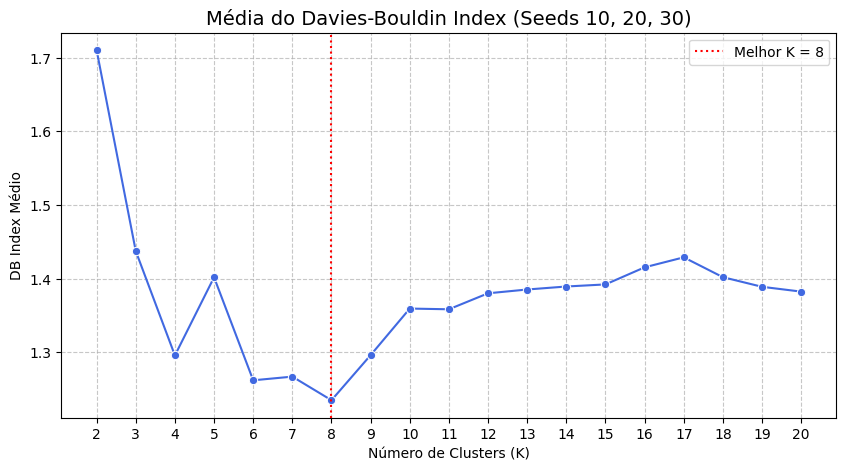

In [70]:

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_db_media, x='K', y='Media_DB_Index', marker='o', color='royalblue')

plt.title('Média do Davies-Bouldin Index (Seeds 10, 20, 30)', fontsize=14)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('DB Index Médio')
plt.xticks(range(2, 21))
plt.grid(True, linestyle='--', alpha=0.7)

# Destacar o melhor K (o menor valor)
melhor_k = df_db_media.loc[df_db_media['Media_DB_Index'].idxmin(), 'K']
plt.axvline(melhor_k, color='red', linestyle=':', label=f'Melhor K = {int(melhor_k)}')
plt.legend()

plt.show()

### 📊 Consolidação de Resultados: Silhouette Score Médio

Além do Davies-Bouldin, utilizamos o **Silhouette Score** como métrica fundamental para validar a qualidade da separação dos clusters. Assim como na etapa anterior, calculamos a média dos resultados obtidos em 3 sementes diferentes para garantir que o desempenho do modelo seja consistente.

#### O que esta etapa realiza:
1. **Agregação por K:** Consolida os resultados das sementes 10, 20 e 30 para cada número de clusters.
2. **Cálculo da Média:** Gera um valor único de Silhueta por $K$, suavizando variações de inicialização.
3. **Ordenação de Performance:** Ranqueia as configurações de $K$ que apresentaram a melhor estrutura de agrupamento.



In [71]:
# 1. Calcular a média da Silhueta para cada K (unindo os seeds 10, 20 e 30)
df_sil_media = df_km_results.groupby('K')['Silhueta'].mean().reset_index()

# 2. Renomear para clareza
df_sil_media.columns = ['K', 'Media_Silhueta']

# 3. Ordenar para ver quais K tiveram os melhores desempenhos médios
df_sil_media_ordenado = df_sil_media.sort_values(by='Media_Silhueta', ascending=False)

# Exibir os resultados
print("Média de Silhueta por K (Média das Seeds 10, 20 e 30):")
print(df_sil_media_ordenado)

Média de Silhueta por K (Média das Seeds 10, 20 e 30):
     K  Media_Silhueta
0    2        0.485375
1    3        0.390173
2    4        0.357305
4    6        0.352869
3    5        0.319497
5    7        0.300960
6    8        0.286973
7    9        0.250016
11  13        0.209435
10  12        0.205147
9   11        0.202905
8   10        0.195960
12  14        0.188926
18  20        0.187516
13  15        0.186467
15  17        0.185907
14  16        0.185530
16  18        0.185179
17  19        0.179872


### 📈 Análise Visual: Silhouette Score Médio

Para complementar a métrica de Davies-Bouldin, analisamos a curva do **Silhouette Score**. Enquanto no índice anterior buscávamos o menor valor, aqui o objetivo é identificar o ponto de **máximo global**, que representa a melhor qualidade de separação entre os grupos de clientes.

#### Interpretação do Gráfico:
- **Eixo X ($K$):** Quantidade de clusters testados (2 a 20).
- **Eixo Y (Silhueta Média):** Média aritmética da silhueta calculada nas 3 sementes.
- **Linha Vermelha Pontilhada:** Destaca o valor de $K$ onde os clusters apresentam a maior coesão interna e a maior distinção em relação aos demais grupos.



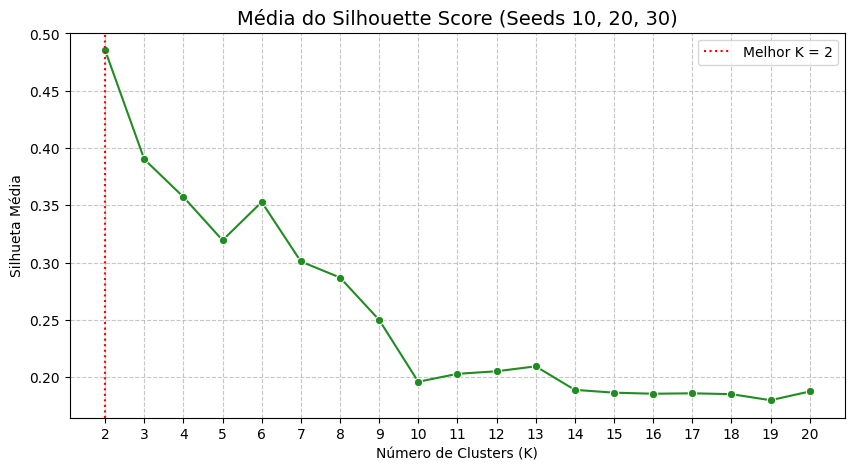

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sil_media, x='K', y='Media_Silhueta', marker='o', color='forestgreen')

plt.title('Média do Silhouette Score (Seeds 10, 20, 30)', fontsize=14)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhueta Média')
plt.xticks(range(2, 21))
plt.grid(True, linestyle='--', alpha=0.7)

# Destacar o melhor K (o maior valor)
melhor_k_sil = df_sil_media.loc[df_sil_media['Media_Silhueta'].idxmax(), 'K']
plt.axvline(melhor_k_sil, color='red', linestyle=':', label=f'Melhor K = {int(melhor_k_sil)}')
plt.legend()

plt.show()

### 📋 Consolidação do Benchmark: K-Means (Média e Estabilidade)

Para uma tomada de decisão final sobre o número de clusters, consolidamos todas as métricas em um único DataFrame de **Benchmark**. Nesta etapa, além da média aritmética, introduzimos o cálculo do **Desvio Padrão (Standard Deviation)**.

#### Por que calcular o Desvio Padrão?
O desvio padrão nos indica a **estabilidade** do algoritmo.
- **Desvio Baixo:** Significa que o K-Means é robusto e chega a resultados muito similares, independente da semente inicial.
- **Desvio Alto:** Indica que o agrupamento é instável e sensível à inicialização, o que pode sugerir que o valor de $K$ está forçando divisões artificiais nos dados.

#### Processamento e Tratamento de Dados:
Como o Pandas gera um `MultiIndex` ao agregar múltiplas funções (`mean` e `std`), realizamos o "achatamento" das colunas para garantir que o DataFrame seja legível e fácil de manipular em etapas futuras de comparação com outros algoritmos.



In [80]:
# Agrupamos por K e pedimos a média (mean) e o desvio padrão (std) de uma vez
df_benchmark = df_km_results.groupby('K').agg({
    'Silhueta': ['mean', 'std'],
    'DB_Index': ['mean', 'std']
}).reset_index()

# O pandas gera colunas em dois níveis (MultiIndex). Vamos "achatar" para os nomes que você quer:
df_benchmark.columns = [
    'K',
    'silhouette kmeans mean',
    'silhouette kmeans std',
    'db index kmeans mean',
    'db index kmeans std'
]

display(df_benchmark)

,K,silhouette kmeans mean,silhouette kmeans std,db index kmeans mean,db index kmeans std
0,2,0.485375,0.001523,1.710206,0.002802
1,3,0.390173,0.038464,1.437227,0.073143
2,4,0.357305,0.002451,1.295468,0.049811
3,5,0.319497,0.047152,1.401670,0.144908
4,6,0.352869,0.007003,1.261693,0.089508
5,7,0.300960,0.037716,1.266687,0.072982
6,8,0.286973,0.006093,1.234629,0.003478
7,9,0.250016,0.018937,1.295893,0.002321
8,10,0.195960,0.022564,1.359174,0.044796
9,11,0.202905,0.020455,1.358192,0.019965


### 📍 Algoritmo 2: DBSCAN (Density-Based Clustering)
Diferente dos algoritmos anteriores, o DBSCAN não exige a definição prévia do número de clusters. Ele se baseia em dois parâmetros fundamentais:
- **EPS (Epsilon):** A distância máxima entre dois pontos para que sejam considerados vizinhos.
- **MinSamples:** O número mínimo de pontos em uma vizinhança para formar um "núcleo" (cluster).
- **Métrica:** Silhouette Score e Davies-Bouldin Index.
- **Diferencial:** Este algoritmo é capaz de identificar **outliers** (ruído), classificando pontos em regiões de baixa densidade como `-1`.

In [83]:
# Lista para armazenar resultados brutos do DBSCAN
resultados_dbscan_brutos = []

# Intervalos de teste para EPS e MinSamples
eps_range = np.arange(0.3, 1.6, 0.1)
min_samples_range = [5, 10, 15]

print("Iniciando busca de parâmetros para DBSCAN (Filtro K: 2 a 20)...")

for eps in eps_range:
    for min_s in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(df_modelagem)

        # Identificando número de clusters (ignorando ruído -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Filtro para o intervalo solicitado
        if 2 <= n_clusters <= 20:
            s_score = silhouette_score(df_modelagem, labels)
            db_score = davies_bouldin_score(df_modelagem, labels)

            resultados_dbscan_brutos.append({
                'K': n_clusters,
                'EPS': round(eps, 2),
                'MinSamples': min_s,
                'Silhueta': s_score,
                'DB_Index': db_score
            })

# Criar DataFrame com todos os testes encontrados
df_dbscan_bruto = pd.DataFrame(resultados_dbscan_brutos)
print(f"Busca finalizada. {len(df_dbscan_bruto)} combinações encontradas.")

Iniciando busca de parâmetros para DBSCAN (Filtro K: 2 a 20)...
Busca finalizada. 21 combinações encontradas.


In [85]:
# 1. Gerar a média para casos onde o mesmo K foi encontrado com parâmetros diferentes
df_dbscan_media = df_dbscan_bruto.groupby('K').agg({
    'Silhueta': 'mean',
    'DB_Index': 'mean'
}).reset_index()

# 2. Renomear colunas para o padrão de benchmark
df_dbscan_media.columns = ['K', 'silhouette dbscan mean', 'db index dbscan mean']

print("Médias calculadas com sucesso!")
display(df_dbscan_media.sort_values(by='K'))

Médias calculadas com sucesso!


,K,silhouette dbscan mean,db index dbscan mean
0,2,0.109115,1.887294
1,3,0.158439,1.808811
2,4,0.396154,1.562804
3,5,0.143882,1.687860
4,6,-0.254632,1.569319
5,7,-0.176752,1.714637
6,12,-0.155347,1.857852
7,13,-0.283226,1.499387
8,14,-0.248934,1.663814
9,15,-0.306151,1.431033


In [87]:
# 1. Gerar média e desvio padrão para o DBSCAN
# O 'std' aqui mede a sensibilidade do K aos parâmetros EPS e MinSamples
df_dbscan_estatistico = df_dbscan_bruto.groupby('K').agg({
    'Silhueta': ['mean', 'std'],
    'DB_Index': ['mean', 'std']
}).reset_index()

# 2. Achatando as colunas
df_dbscan_estatistico.columns = [
    'K',
    'silhouette dbscan mean', 'silhouette dbscan std',
    'db index dbscan mean', 'db index dbscan std'
]

# 3. Preencher K_encontrado com 0 onde não houver variação (apenas 1 combinação para aquele K)
df_dbscan_estatistico = df_dbscan_estatistico.fillna(0)

display(df_dbscan_estatistico)

,K,silhouette dbscan mean,silhouette dbscan std,db index dbscan mean,db index dbscan std
0,2,0.109115,0.335307,1.887294,0.252634
1,3,0.158439,0.238105,1.808811,0.249030
2,4,0.396154,0.000000,1.562804,0.000000
3,5,0.143882,0.074754,1.687860,0.197603
4,6,-0.254632,0.036104,1.569319,0.014186
5,7,-0.176752,0.159808,1.714637,0.051679
6,12,-0.155347,0.050059,1.857852,0.110639
7,13,-0.283226,0.000000,1.499387,0.000000
8,14,-0.248934,0.000000,1.663814,0.000000
9,15,-0.306151,0.000000,1.431033,0.000000


In [88]:
# Unindo K-Means e DBSCAN com todas as estatísticas
df_benchmark = pd.merge(df_benchmark, df_dbscan_estatistico, on='K', how='left')

display(df_benchmark)

,K,silhouette kmeans mean,silhouette kmeans std,db index kmeans mean,db index kmeans std,silhouette dbscan mean,silhouette dbscan std,db index dbscan mean,db index dbscan std
0,2,0.485375,0.001523,1.710206,0.002802,0.109115,0.335307,1.887294,0.252634
1,3,0.390173,0.038464,1.437227,0.073143,0.158439,0.238105,1.808811,0.249030
2,4,0.357305,0.002451,1.295468,0.049811,0.396154,0.000000,1.562804,0.000000
3,5,0.319497,0.047152,1.401670,0.144908,0.143882,0.074754,1.687860,0.197603
4,6,0.352869,0.007003,1.261693,0.089508,-0.254632,0.036104,1.569319,0.014186
5,7,0.300960,0.037716,1.266687,0.072982,-0.176752,0.159808,1.714637,0.051679
6,8,0.286973,0.006093,1.234629,0.003478,NaN,NaN,NaN,NaN
7,9,0.250016,0.018937,1.295893,0.002321,NaN,NaN,NaN,NaN
8,10,0.195960,0.022564,1.359174,0.044796,NaN,NaN,NaN,NaN
9,11,0.202905,0.020455,1.358192,0.019965,NaN,NaN,NaN,NaN


### 📍 Algoritmo 3: Agrupamento Hierárquico (Agglomerative Clustering)

O **Agrupamento Hierárquico** adota uma abordagem "de baixo para cima" (*bottom-up*). Cada ponto de dado começa como um cluster individual e, sucessivamente, os pares de clusters mais próximos são mesclados até que todos os pontos formem um único grupo ou o número desejado de clusters ($K$) seja atingido.

#### Configuração do Modelo:
- **Linkage (Critério de Ligação):** Utilizamos o método **Ward**. Este critério minimiza a variância total dentro dos clusters, o que tende a criar grupos de tamanhos mais equilibrados e compactos.
- **Métrica de Distância:** Distância Euclidiana.
- **Estabilidade:** Diferente do K-Means, este algoritmo é **determinístico**. Para um mesmo conjunto de dados, o resultado será sempre o mesmo, eliminando a necessidade de múltiplas sementes aleatórias.





In [90]:
# Lista para armazenar resultados do Hierárquico
resultados_hierarquico = []

k_range = range(2, 21)

print("Iniciando processamento do Agrupamento Hierárquico...")

for k in k_range:
    # O linkage 'ward' é o mais comum, pois minimiza a variância dentro dos clusters
    hierarquico = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarquico.fit_predict(df_modelagem)

    # Calculando as métricas
    s_score = silhouette_score(df_modelagem, labels)
    db_score = davies_bouldin_score(df_modelagem, labels)

    resultados_hierarquico.append({
        'K': k,
        'Silhueta': s_score,
        'DB_Index': db_score
    })

# Criando DataFrame para análise
df_h_results = pd.DataFrame(resultados_hierarquico)
print("Concluído!")

# Exibindo os melhores por Silhueta
display(df_h_results.sort_values(by='Silhueta', ascending=False).head())

Iniciando processamento do Agrupamento Hierárquico...
Concluído!


,K,Silhueta,DB_Index
0,2,0.480725,1.330979
4,6,0.322410,1.223360
3,5,0.316692,1.336581
1,3,0.312843,1.640708
2,4,0.311877,1.492161


### 📊 Padronização Estatística: Agrupamento Hierárquico

Para consolidar os resultados do **Agrupamento Hierárquico** no benchmark comparativo, realizamos uma etapa de estruturação de dados. Embora este algoritmo seja determinístico, seguimos o padrão de métricas (Média e Desvio Padrão) estabelecido para o K-Means, garantindo a integridade da tabela final.

#### 🛠️ Processo de Estruturação
Como o algoritmo não sofre variações entre execuções, os valores obtidos representam a performance absoluta para cada $K$. O código abaixo prepara essas métricas:

1. **Criação de Colunas de Controle:** Adicionamos colunas de desvio padrão (`std`) preenchidas com `0.0`, refletindo a estabilidade total do modelo.
2. **Renomeação Padronizada:** Ajustamos os nomes das colunas para facilitar a futura união (*merge*) com os resultados do K-Means e DBSCAN.
3. **Organização Hierárquica:** Reestruturamos a ordem das colunas para manter a leitura lógica: **K -> Silhouette (Mean/Std) -> DB Index (Mean/Std)**.



In [91]:
# 1. Criar o DataFrame de médias e desvios (simulando a estrutura)
df_h_estatistico = df_h_results.copy()

# 2. Criar as colunas de desvio padrão preenchidas com 0.0
# Como não há variação entre seeds, o desvio é nulo.
df_h_estatistico['silhouette hierarquico std'] = 0.0
df_h_estatistico['db index hierarquico std'] = 0.0

# 3. Renomear as colunas de métricas para o padrão do Benchmark
df_h_estatistico = df_h_estatistico.rename(columns={
    'Silhueta': 'silhouette hierarquico mean',
    'DB_Index': 'db index hierarquico mean'
})

# Reorganizando a ordem das colunas para facilitar o merge
df_h_estatistico = df_h_estatistico[[
    'K',
    'silhouette hierarquico mean', 'silhouette hierarquico std',
    'db index hierarquico mean', 'db index hierarquico std'
]]

print("DataFrame Hierárquico preparado:")
display(df_h_estatistico.head())

DataFrame Hierárquico preparado:


,K,silhouette hierarquico mean,silhouette hierarquico std,db index hierarquico mean,db index hierarquico std
0,2,0.480725,0.0,1.330979,0.0
1,3,0.312843,0.0,1.640708,0.0
2,4,0.311877,0.0,1.492161,0.0
3,5,0.316692,0.0,1.336581,0.0
4,6,0.322410,0.0,1.223360,0.0


### 🔄 Consolidação do Benchmark Global (K-Means, DBSCAN e Hierárquico)

Nesta etapa crucial do projeto, realizamos a união de todos os experimentos em uma única estrutura de dados centralizada. O objetivo é permitir uma comparação direta e técnica entre os diferentes paradigmas de agrupamento testados até agora.

#### 🛠️ Estratégia de Unificação
Utilizamos a técnica de **Left Join** (União à Esquerda) baseada na coluna $K$ (número de clusters).

1. **Base de Comparação:** Mantemos o intervalo de $K=2$ a $K=20$ definido inicialmente no K-Means.
2. **Integração do DBSCAN:** Como o DBSCAN é baseado em densidade e não encontra todos os valores de $K$, suas lacunas são tratadas como `NaN` (não disponível), evidenciando quais granularidades são "naturais" para este algoritmo.
3. **Integração do Hierárquico:** Adicionamos as métricas estáveis (determinísticas) do modelo aglomerativo.



In [92]:
# Unindo o Hierárquico ao Benchmark Global
# Usamos how='left' para garantir que mantemos todos os K de 2 a 20
df_benchmark = pd.merge(df_benchmark, df_h_estatistico, on='K', how='left')

print("Benchmark atualizado com K-Means, DBSCAN e Hierárquico!")
display(df_benchmark)

Benchmark atualizado com K-Means, DBSCAN e Hierárquico!


,K,silhouette kmeans mean,silhouette kmeans std,db index kmeans mean,db index kmeans std,silhouette dbscan mean,silhouette dbscan std,db index dbscan mean,db index dbscan std,silhouette hierarquico mean,silhouette hierarquico std,db index hierarquico mean,db index hierarquico std
0,2,0.485375,0.001523,1.710206,0.002802,0.109115,0.335307,1.887294,0.252634,0.480725,0.0,1.330979,0.0
1,3,0.390173,0.038464,1.437227,0.073143,0.158439,0.238105,1.808811,0.249030,0.312843,0.0,1.640708,0.0
2,4,0.357305,0.002451,1.295468,0.049811,0.396154,0.000000,1.562804,0.000000,0.311877,0.0,1.492161,0.0
3,5,0.319497,0.047152,1.401670,0.144908,0.143882,0.074754,1.687860,0.197603,0.316692,0.0,1.336581,0.0
4,6,0.352869,0.007003,1.261693,0.089508,-0.254632,0.036104,1.569319,0.014186,0.322410,0.0,1.223360,0.0
5,7,0.300960,0.037716,1.266687,0.072982,-0.176752,0.159808,1.714637,0.051679,0.298986,0.0,1.265720,0.0
6,8,0.286973,0.006093,1.234629,0.003478,NaN,NaN,NaN,NaN,0.151162,0.0,1.375727,0.0
7,9,0.250016,0.018937,1.295893,0.002321,NaN,NaN,NaN,NaN,0.154118,0.0,1.370132,0.0
8,10,0.195960,0.022564,1.359174,0.044796,NaN,NaN,NaN,NaN,0.154747,0.0,1.414063,0.0
9,11,0.202905,0.020455,1.358192,0.019965,NaN,NaN,NaN,NaN,0.156457,0.0,1.329769,0.0


### 📍 Algoritmo 4: Expectation-Maximization (Gaussian Mixture Models)

O **Gaussian Mixture Model (GMM)** é um modelo probabilístico que assume que todos os pontos de dados são gerados a partir de uma mistura de um número finito de distribuições gaussianas com parâmetros desconhecidos.



#### Diferenciais Técnicos:
- **Flexibilidade de Forma:** Diferente do K-Means (que busca clusters esféricos), o GMM pode identificar clusters elípticos graças à sua matriz de covariância.
- **Atribuição Probabilística:** Utiliza o algoritmo **Expectation-Maximization (EM)** para estimar a probabilidade de cada ponto pertencer a cada cluster.
- **Robustez:** Assim como o K-Means, o GMM é sensível à inicialização, por isso aplicamos o teste com múltiplas sementes (**10, 20, 30**) para garantir que os resultados de Silhueta e Davies-Bouldin sejam estatisticamente confiáveis.

#### Critérios de Avaliação:
Integramos o GMM ao nosso benchmark calculando a média e o desvio padrão das métricas entre as sementes, permitindo comparar sua performance diretamente com os métodos geométricos e de densidade.

In [95]:
# Lista para armazenar resultados brutos do GMM
resultados_gmm_brutos = []
seeds = [10, 20, 30]

print("Iniciando processamento do GMM (Seeds 10, 20, 30)...")

for k in range(2, 21):
    for seed in seeds:
        # Inicializando o GMM
        gmm = GaussianMixture(n_components=k, random_state=seed)
        labels = gmm.fit_predict(df_modelagem)

        # Calculando as métricas
        s_score = silhouette_score(df_modelagem, labels)
        db_score = davies_bouldin_score(df_modelagem, labels)

        resultados_gmm_brutos.append({
            'K': k,
            'Seed': seed,
            'Silhueta': s_score,
            'DB_Index': db_score
        })

# Criar DataFrame bruto
df_gmm_bruto = pd.DataFrame(resultados_gmm_brutos)

Iniciando processamento do GMM (Seeds 10, 20, 30)...


In [96]:
df_gmm_bruto

,K,Seed,Silhueta,DB_Index
0,2,10,0.294313,2.177558
1,2,20,0.294101,2.177686
2,2,30,0.294101,2.177686
3,3,10,0.068229,2.642206
4,3,20,0.068276,2.641850
5,3,30,0.067497,2.669400
6,4,10,0.066475,3.671533
7,4,20,0.060948,2.811563
8,4,30,0.066461,3.672034
9,5,10,0.071571,2.448074


In [97]:
# 1. Agrupar por K e calcular estatísticas
df_gmm_estatistico = df_gmm_bruto.groupby('K').agg({
    'Silhueta': ['mean', 'std'],
    'DB_Index': ['mean', 'std']
}).reset_index()

# 2. Achatar colunas e renomear para o padrão
df_gmm_estatistico.columns = [
    'K',
    'silhouette gmm mean', 'silhouette gmm std',
    'db index gmm mean', 'db index gmm std'
]

# 3. Unir ao Benchmark Global
df_benchmark = pd.merge(df_benchmark, df_gmm_estatistico, on='K', how='left')

print("Benchmark Final Concluído com os 4 Algoritmos!")
display(df_benchmark.head())

Benchmark Final Concluído com os 4 Algoritmos!


,K,silhouette kmeans mean,silhouette kmeans std,db index kmeans mean,db index kmeans std,silhouette dbscan mean,silhouette dbscan std,db index dbscan mean,db index dbscan std,silhouette hierarquico mean,silhouette hierarquico std,db index hierarquico mean,db index hierarquico std,silhouette gmm mean,silhouette gmm std,db index gmm mean,db index gmm std
0,2,0.485375,0.001523,1.710206,0.002802,0.109115,0.335307,1.887294,0.252634,0.480725,0.0,1.330979,0.0,0.294172,0.000123,2.177643,0.000073
1,3,0.390173,0.038464,1.437227,0.073143,0.158439,0.238105,1.808811,0.249030,0.312843,0.0,1.640708,0.0,0.068001,0.000437,2.651152,0.015804
2,4,0.357305,0.002451,1.295468,0.049811,0.396154,0.000000,1.562804,0.000000,0.311877,0.0,1.492161,0.0,0.064628,0.003187,3.385044,0.496649
3,5,0.319497,0.047152,1.401670,0.144908,0.143882,0.074754,1.687860,0.197603,0.316692,0.0,1.336581,0.0,0.054459,0.017307,3.005866,0.488040
4,6,0.352869,0.007003,1.261693,0.089508,-0.254632,0.036104,1.569319,0.014186,0.322410,0.0,1.223360,0.0,0.049330,0.004347,3.143359,0.192423


In [98]:


# 1. Definir a hierarquia das colunas (Algoritmo, Métrica)
# Cada tupla representa (Nível Superior, Nível Inferior)
hierarquia_colunas = [
    ('Geral', 'K'),
    ('K-Means', 'Silhouette Mean'), ('K-Means', 'Silhouette Std'),
    ('K-Means', 'DB Index Mean'), ('K-Means', 'DB Index Std'),
    ('DBSCAN', 'Silhouette Mean'), ('DBSCAN', 'Silhouette Std'),
    ('DBSCAN', 'DB Index Mean'), ('DBSCAN', 'DB Index Std'),
    ('Hierárquico', 'Silhouette Mean'), ('Hierárquico', 'Silhouette Std'),
    ('Hierárquico', 'DB Index Mean'), ('Hierárquico', 'DB Index Std'),
    ('GMM', 'Silhouette Mean'), ('GMM', 'Silhouette Std'),
    ('GMM', 'DB Index Mean'), ('GMM', 'DB Index Std')
]

# 2. Criar o objeto MultiIndex
colunas_multi = pd.MultiIndex.from_tuples(hierarquia_colunas)

# 3. Criar o novo DataFrame usando os valores do seu df_benchmark atual
# IMPORTANTE: A ordem das colunas no seu df_benchmark deve ser a mesma da lista acima
df_final_multi = pd.DataFrame(df_benchmark.values, columns=colunas_multi)

# 4. Ajustes finos: Converter K para inteiro e formatar decimais para exibição
df_final_multi[('Geral', 'K')] = df_final_multi[('Geral', 'K')].astype(int)

print("🏆 Benchmark Final Consolidado (Multi-Algoritmo)")
display(df_final_multi)

🏆 Benchmark Final Consolidado (Multi-Algoritmo)


Geral         K-Means                                            \
       K Silhouette Mean Silhouette Std DB Index Mean DB Index Std   
0      2        0.485375       0.001523      1.710206     0.002802   
1      3        0.390173       0.038464      1.437227     0.073143   
2      4        0.357305       0.002451      1.295468     0.049811   
3      5        0.319497       0.047152      1.401670     0.144908   
4      6        0.352869       0.007003      1.261693     0.089508   
5      7        0.300960       0.037716      1.266687     0.072982   
6      8        0.286973       0.006093      1.234629     0.003478   
7      9        0.250016       0.018937      1.295893     0.002321   
8     10        0.195960       0.022564      1.359174     0.044796   
9     11        0.202905       0.020455      1.358192     0.019965   
10    12        0.205147       0.022343      1.379912     0.033496   
11    13        0.209435       0.019548      1.385075     0.030990   
12    14        0.188926       0.006030      1.389146     0.048147   
13    15        0.186467       0.002243      1.391981     0.030629   
14    16        0.185530       0.002498      1.415203     0.029255   
15    17        0.185907       0.005492      1.428777     0.065712   
16    18        0.185179       0.006917      1.401821     0.048189   
17    19        0.179872       0.004587      1.388739     0.066932   
18    20        0.187516       0.001713      1.382201     0.055284   

            DBSCAN                                               Hierárquico  \
   Silhouette Mean Silhouette Std DB Index Mean DB Index Std Silhouette Mean   
0         0.109115       0.335307      1.887294     0.252634        0.480725   
1         0.158439       0.238105      1.808811     0.249030        0.312843   
2         0.396154       0.000000      1.562804     0.000000        0.311877   
3         0.143882       0.074754      1.687860     0.197603        0.316692   
4        -0.254632       0.036104      1.569319     0.014186        0.322410   
5        -0.176752       0.159808      1.714637     0.051679        0.298986   
6              NaN            NaN           NaN          NaN        0.151162   
7              NaN            NaN           NaN          NaN        0.154118   
8              NaN            NaN           NaN          NaN        0.154747   
9              NaN            NaN           NaN          NaN        0.156457   
10       -0.155347       0.050059      1.857852     0.110639        0.159790   
11       -0.283226       0.000000      1.499387     0.000000        0.151036   
12       -0.248934       0.000000      1.663814     0.000000        0.153433   
13       -0.306151       0.000000      1.431033     0.000000        0.154994   
14             NaN            NaN           NaN          NaN        0.156878   
15             NaN            NaN           NaN          NaN        0.158875   
16             NaN            NaN           NaN          NaN        0.113084   
17             NaN            NaN           NaN          NaN        0.113990   
18             NaN            NaN           NaN          NaN        0.114073   

                                                         GMM                 \
   Silhouette Std DB Index Mean DB Index Std Silhouette Mean Silhouette Std   
0             0.0      1.330979          0.0        0.294172       0.000123   
1             0.0      1.640708          0.0        0.068001       0.000437   
2             0.0      1.492161          0.0        0.064628       0.003187   
3             0.0      1.336581          0.0        0.054459       0.017307   
4             0.0      1.223360          0.0        0.049330       0.004347   
5             0.0      1.265720          0.0        0.003595       0.048302   
6             0.0      1.375727          0.0       -0.084319       0.010076   
7             0.0      1.370132          0.0       -0.056249       0.024159   
8             0.0      1.414063          0.0       -0.037656 

In [99]:
# Aplicando estilo para centralizar os cabeçalhos e formatar os números
df_estilizado = df_final_multi.style.set_table_styles([
    # Centraliza o texto dos cabeçalhos de todos os níveis
    {'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#f4f4f4'), ('border', '1px solid #ddd')]},
    # Centraliza os dados nas células
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).format(precision=4) # Limita para 4 casas decimais para não poluir visualmente

# Exibir
df_estilizado